In [274]:
import pandas as pd
import seaborn as sns
import numpy as np
import ppscore as pps
import matplotlib.pyplot as plt

### Initial formatting and parsing

In [289]:
df = pd.read_excel("ACDC_Component_Cracks_2022.03.03-04(16).xlsx", sheet_name=1)
df[""]

In [290]:
#df.tail()
df[['signalId','signalName']].value_counts()

signalId  signalName            
106001    ESP_v_Signal              2916
132710    FA_BodyAcceleration_HR     847
132707    FA_BodyAcceleration_VR     776
132703    FA_BodyAcceleration_VL     733
132705    FA_BodyAcceleration_HL     720
132706    FA_Hoehenwert_HL_00         68
132709    FA_Hoehenwert_VR_00         65
132704    FA_Hoehenwert_VL_00         64
132708    FA_Hoehenwert_HR_00         57
dtype: int64

In [291]:
df.signalName.unique()

array(['FA_Hoehenwert_HL_00', 'FA_BodyAcceleration_HL', 'ESP_v_Signal',
       'FA_BodyAcceleration_VL', 'FA_BodyAcceleration_VR',
       'FA_Hoehenwert_VL_00', 'FA_BodyAcceleration_HR',
       'FA_Hoehenwert_VR_00', 'FA_Hoehenwert_HR_00'], dtype=object)

In [292]:
dfESP = df[df.signalName == "ESP_v_Signal"]
dfFA = df[df.signalName != "ESP_v_Signal"]

In [293]:
dfsplit = dfFA.signalName.apply(lambda x:x.split("_"))
dfFA = dfFA.assign(
    signal = dfsplit.apply(lambda x: x[1]),
    position = dfsplit.apply(lambda x: x[2]),
).drop(columns=['signalId', 'date', 'signalName'])
dfsplit

0       [FA, Hoehenwert, HL, 00]
1       [FA, Hoehenwert, HL, 00]
2       [FA, Hoehenwert, HL, 00]
3       [FA, Hoehenwert, HL, 00]
4       [FA, Hoehenwert, HL, 00]
                  ...           
6241    [FA, Hoehenwert, HR, 00]
6242    [FA, Hoehenwert, HR, 00]
6243    [FA, Hoehenwert, HR, 00]
6244    [FA, Hoehenwert, HR, 00]
6245    [FA, Hoehenwert, HR, 00]
Name: signalName, Length: 3330, dtype: object

In [294]:
dfH = dfFA[dfFA.signal == "Hoehenwert"]

### Checking on the distribution of values for the hight

position
HL    AxesSubplot(0.125,0.125;0.775x0.755)
HR    AxesSubplot(0.125,0.125;0.775x0.755)
VL    AxesSubplot(0.125,0.125;0.775x0.755)
VR    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

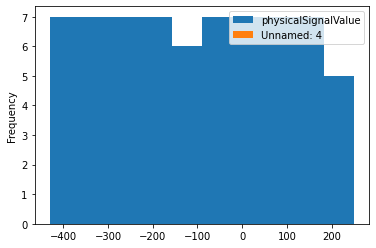

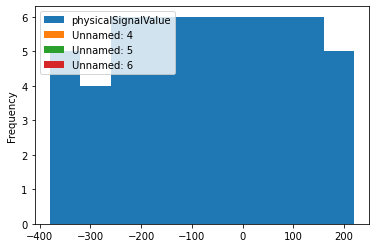

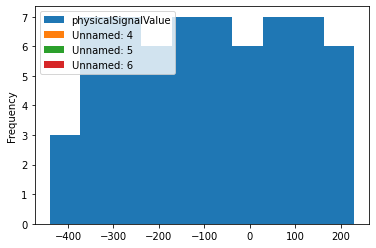

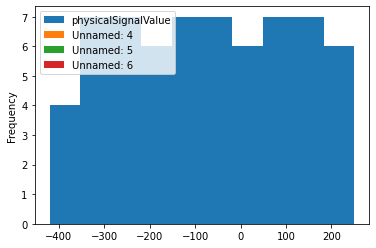

In [295]:
dfH.groupby("position").plot(kind="hist")

In [296]:
dfH.groupby("position").count()

,physicalSignalValue,Unnamed: 4,Unnamed: 5,Unnamed: 6,signal
position,,,,,
HL,67,0,17,3,68
HR,56,0,0,0,57
VL,63,0,0,0,64
VR,64,0,0,0,65


In [297]:
# in order to calculate the covariance matrix, we assume that the signal values on the four positions are mesured at the same time.
dfH = dfH.assign(count = dfH.groupby("position").cumcount())
sample_matrix_hohenwert = dfH.pivot(index='count', columns='position', values='physicalSignalValue').iloc[:27].fillna(axis=0, method='bfill')

In [298]:
sample_matrix_hohenwert

position,HL,HR,VL,VR
count,,,,
0,0.0,-30.0,-30.0,10.0
1,-30.0,-10.0,-40.0,-60.0
2,-10.0,-20.0,-20.0,-10.0
3,20.0,-60.0,-10.0,-30.0
4,-20.0,0.0,0.0,-20.0
5,30.0,-40.0,50.0,-40.0
6,-50.0,10.0,-60.0,0.0
7,-70.0,-50.0,20.0,40.0
8,-60.0,-70.0,-50.0,30.0


In [299]:
cov_matrix_hohenwert = sample_matrix_hohenwert.cov()

<AxesSubplot:xlabel='position', ylabel='position'>

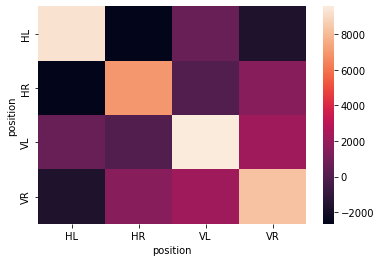

In [300]:
sns.heatmap(cov_matrix_hohenwert)

<AxesSubplot:xlabel='count'>

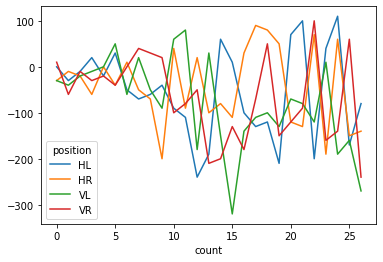

In [301]:
sample_matrix_hohenwert.plot(kind="line")

In [302]:
cov_matrix_hohenwert.describe()

position,HL,HR,VL,VR
count,4.000000,4.000000,4.000000,4.000000
mean,1388.425926,1436.004274,3062.820513,2558.760684
std,5429.220999,4051.746526,4427.747441,4145.051076
min,-2657.264957,-2657.264957,-42.307692,-1658.547009
25%,-1908.226496,-696.047009,437.500000,712.286325
50%,-530.555556,730.128205,1366.025641,1818.589744
75%,2766.096866,2862.179487,3991.346154,3665.064103
max,9272.079772,6941.025641,9561.538462,8256.410256


### Data analyyis for body acceleration

In [303]:
df_body_acceleration = dfFA[dfFA.signal == "BodyAcceleration"]
df_body_acceleration

,physicalSignalValue,Unnamed: 4,Unnamed: 5,Unnamed: 6,signal,position
68,-3.000000e+16,NaN,NaN,NaN,BodyAcceleration,HL
69,-1.000000e+15,NaN,NaN,NaN,BodyAcceleration,HL
70,1.900000e+16,NaN,NaN,NaN,BodyAcceleration,HL
71,-4.900000e+16,NaN,NaN,NaN,BodyAcceleration,HL
72,-5.300000e+15,NaN,NaN,NaN,BodyAcceleration,HL
...,...,...,...,...,...,...
6119,9.010000e+15,NaN,NaN,NaN,BodyAcceleration,HR
6120,1.345000e+03,NaN,NaN,NaN,BodyAcceleration,HR
6121,-7.630000e+15,NaN,NaN,NaN,BodyAcceleration,HR
6122,-5.510000e+02,NaN,NaN,NaN,BodyAcceleration,HR


# Checking on the distribution of values for the body acceleration

position
HL    AxesSubplot(0.125,0.125;0.775x0.755)
HR    AxesSubplot(0.125,0.125;0.775x0.755)
VL    AxesSubplot(0.125,0.125;0.775x0.755)
VR    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

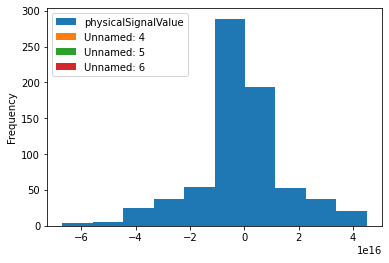

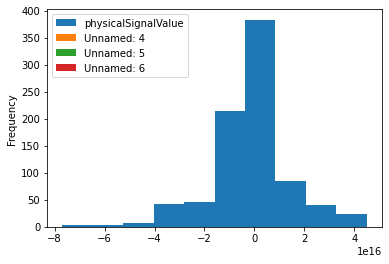

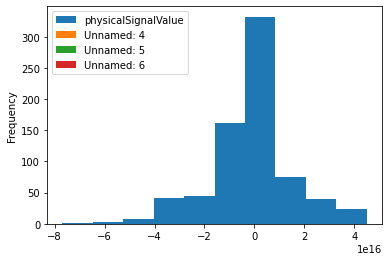

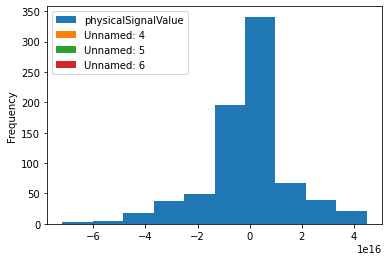

In [304]:
df_body_acceleration.groupby("position").plot(kind="hist")

In [285]:
df.signalId

0       132706
1       132706
2       132706
3       132706
4       132706
         ...  
2022    132708
2023    132708
2024    132708
2025    132708
2026    132708
Name: signalId, Length: 2027, dtype: int64

In [305]:
df_body_acceleration.groupby("position").count()

,physicalSignalValue,Unnamed: 4,Unnamed: 5,Unnamed: 6,signal
position,,,,,
HL,719,0,0,0,720
HR,847,0,0,0,847
VL,732,0,0,0,733
VR,775,0,0,0,776


In [313]:
# in order to calculate the covariance matrix, we assume that the signal values on the four positions are mesured at the same time.
df_body_acceleration = df_body_acceleration.assign(count = df_body_acceleration.groupby("position").cumcount())
sample_matrix_acceleration = df_body_acceleration.pivot(index='count', columns='position', values='physicalSignalValue').iloc[:700].fillna(axis=0, method='bfill')

In [314]:
sample_matrix_acceleration

position,HL,HR,VL,VR
count,,,,
0,-3.000000e+16,-3.900000e+16,-3.000000e+16,7.000000e+15
1,-1.000000e+15,5.000000e+15,-7.000000e+15,9.000000e+15
2,1.900000e+16,9.000000e+15,-1.500000e+16,3.000000e+16
3,-4.900000e+16,1.100000e+16,-4.100000e+16,-2.300000e+16
4,-5.300000e+15,1.000000e+16,-3.300000e+15,-3.100000e+15
...,...,...,...,...
695,-5.930000e+02,1.003000e+16,5.450000e+15,6.310000e+15
696,4.870000e+15,-5.090000e+02,-7.310000e+15,-6.050000e+15
697,7.590000e+02,-5.470000e+15,6.110000e+15,1.277000e+03


In [315]:
cov_matrix_acceleration = sample_matrix_acceleration.cov()
cov_matrix_acceleration

position,HL,HR,VL,VR
position,,,,
HL,2.749661e+32,-3.720262e+30,1.022335e+31,-8.703581e+30
HR,-3.720262e+30,2.701130e+32,5.613631e+30,-9.789583e+30
VL,1.022335e+31,5.613631e+30,2.689573e+32,-1.763312e+30
VR,-8.703581e+30,-9.789583e+30,-1.763312e+30,2.766816e+32


<AxesSubplot:xlabel='position', ylabel='position'>

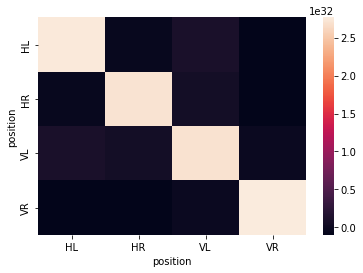

In [316]:
sns.heatmap(cov_matrix_acceleration)

### Plotting the first 20 values of the acceleration data

<AxesSubplot:xlabel='count'>

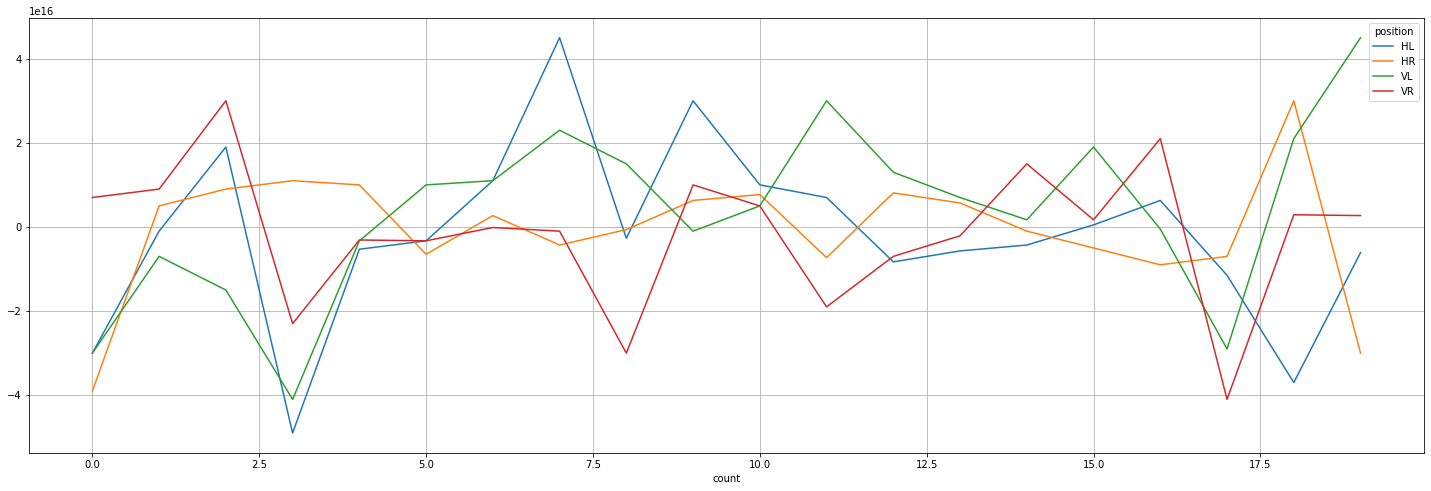

In [317]:
sample_matrix_acceleration[:20].plot(kind="line", figsize=(25,8), grid=True)


### Plotting the first 100 values of the acceleration data

<AxesSubplot:xlabel='count'>

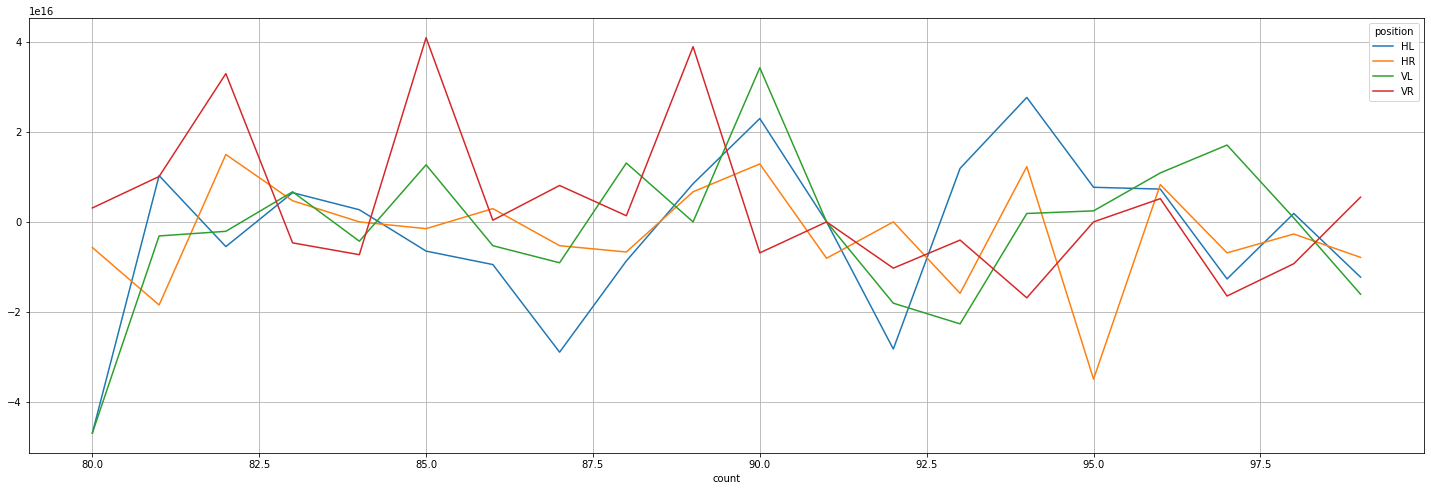

In [318]:
sample_matrix_acceleration[80:100].plot(kind="line", figsize=(25,8), grid=True)

### Plotting all the values for the acceleration data 

<AxesSubplot:xlabel='count'>

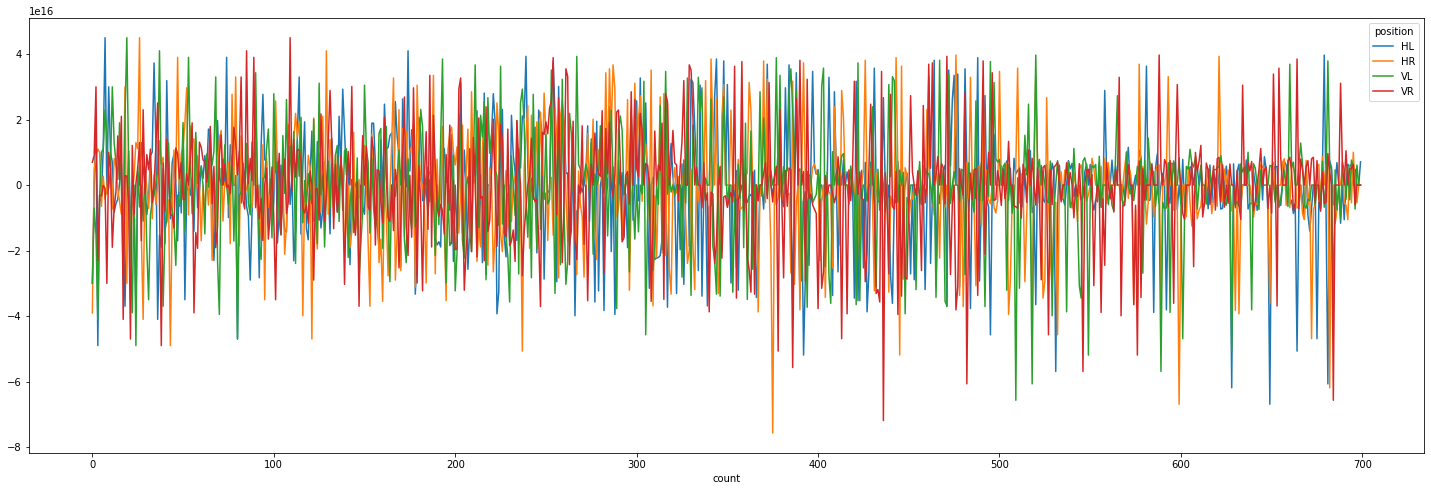

In [320]:
sample_matrix_acceleration.plot(kind="line", figsize=(25,8))

<AxesSubplot:xlabel='position'>

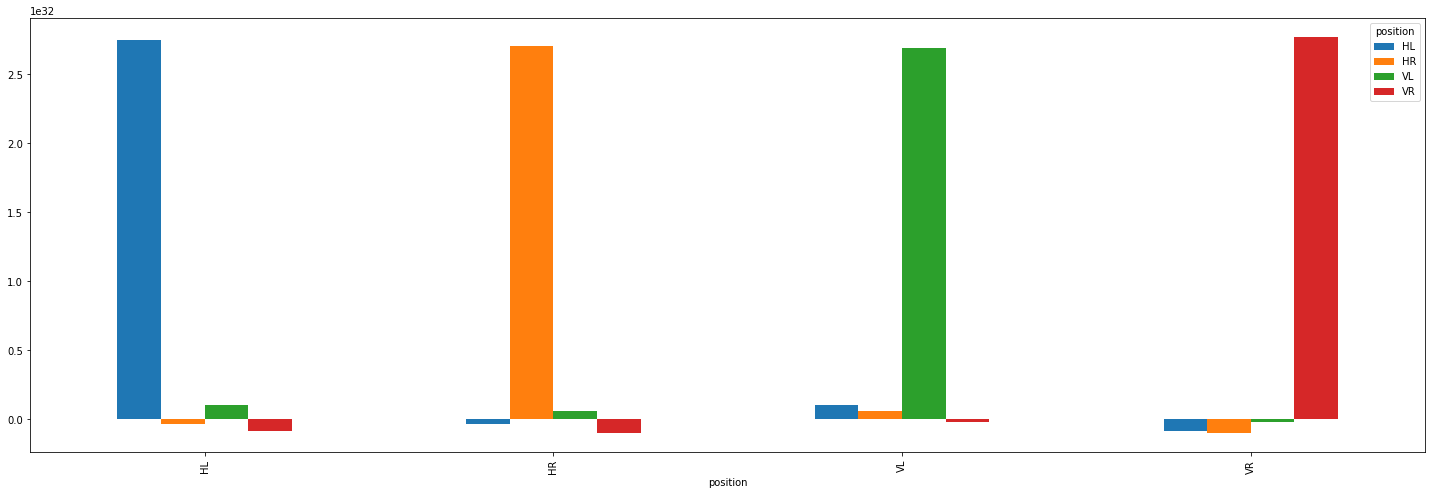

In [321]:
cov_matrix_acceleration.plot(kind="bar", figsize=(25,8))

## Nornalization of the covariance matrix: 
### Pearson correlation coefficient is a measure of linear correlation between two sets of data. It is the ratio between the covariance[3] of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation.

position        HL        HR        VL        VR
position                                        
HL        1.000000 -0.013651  0.037593 -0.031555
HR       -0.013651  1.000000  0.020827 -0.035810
VL        0.037593  0.020827  1.000000 -0.006464
VR       -0.031555 -0.035810 -0.006464  1.000000


<AxesSubplot:xlabel='position', ylabel='position'>

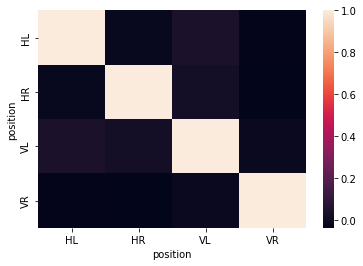

In [322]:
#my_rho = np.corrcoef(sample_matrix_acceleration)
normalized_cov = sample_matrix_acceleration.corr(method='pearson')
print(normalized_cov)
sns.heatmap(normalized_cov)

position        HL        HR        VL        VR
position                                        
HL        1.000000 -0.331234  0.063451 -0.189559
HR       -0.331234  1.000000 -0.005193  0.198484
VL        0.063451 -0.005193  1.000000  0.240248
VR       -0.189559  0.198484  0.240248  1.000000


<AxesSubplot:xlabel='position', ylabel='position'>

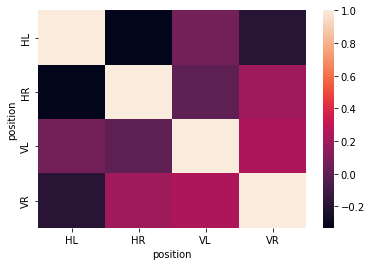

In [323]:
normalized_cov = sample_matrix_hohenwert.corr(method='pearson')
print(normalized_cov)
sns.heatmap(normalized_cov)

### Non Linearity analysis

<AxesSubplot:xlabel='count'>

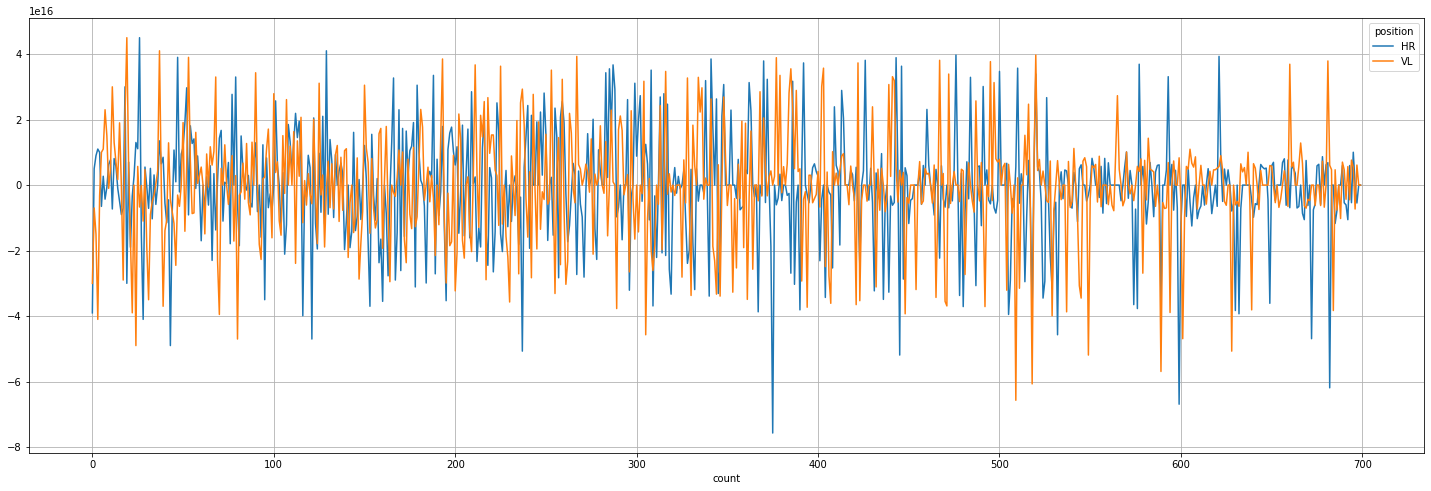

In [331]:
sample_matrix_acceleration[['HR','VL']].plot(kind="line", figsize=(25,8), grid=True)

<AxesSubplot:xlabel='HR', ylabel='VL'>

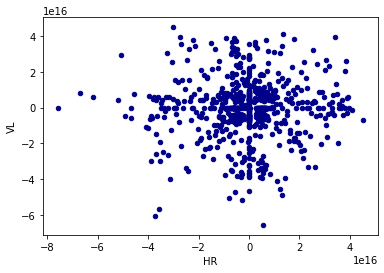

In [325]:
sample_matrix_acceleration.plot.scatter(x='HR', y='VL', c='DarkBlue')

### Predictive Power Score to try to discover non linear correlation

In [326]:
pps.score(sample_matrix_acceleration, 'VR', 'VL')

{'x': 'VR',
 'y': 'VL',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.1214228571428666e+16,
 'model_score': 1.7751742857142876e+16,
 'model': DecisionTreeRegressor()}

<AxesSubplot:xlabel='VR', ylabel='VL'>

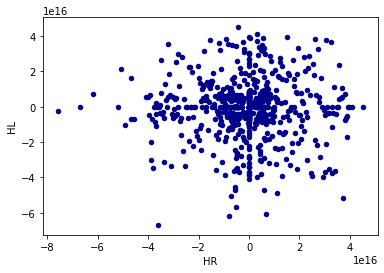

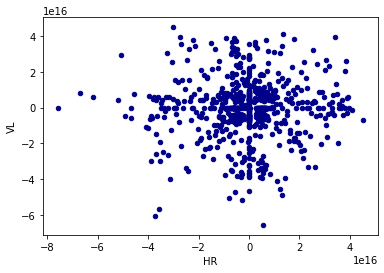

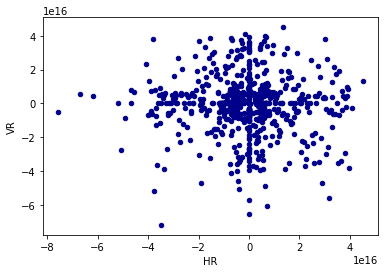

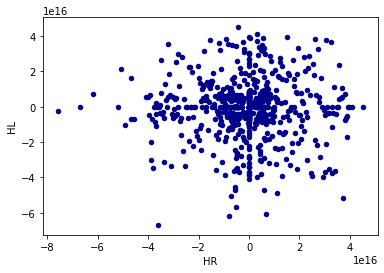

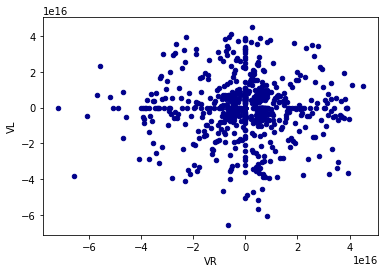

In [329]:
sample_matrix_acceleration.plot.scatter(x='HR', y='HL', c='DarkBlue')
sample_matrix_acceleration.plot.scatter(x='HR', y='VL', c='DarkBlue')
sample_matrix_acceleration.plot.scatter(x='HR', y='VR', c='DarkBlue')
sample_matrix_acceleration.plot.scatter(x='HR', y='HL', c='DarkBlue')
sample_matrix_acceleration.plot.scatter(x='VR', y='VL', c='DarkBlue')

<AxesSubplot:xlabel='VR', ylabel='VL'>

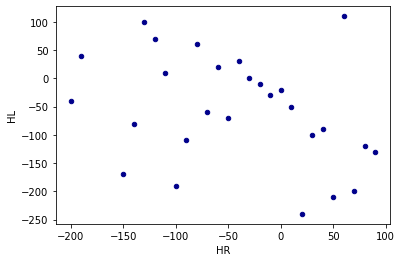

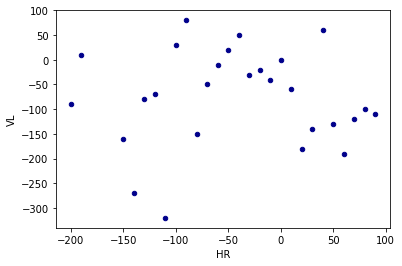

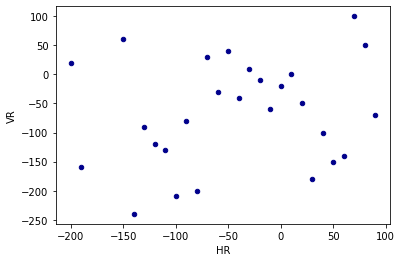

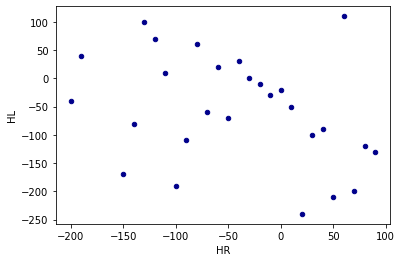

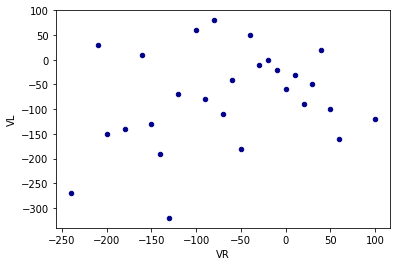

In [330]:
sample_matrix_hohenwert.plot.scatter(x='HR', y='HL', c='DarkBlue')
sample_matrix_hohenwert.plot.scatter(x='HR', y='VL', c='DarkBlue')
sample_matrix_hohenwert.plot.scatter(x='HR', y='VR', c='DarkBlue')
sample_matrix_hohenwert.plot.scatter(x='HR', y='HL', c='DarkBlue')
sample_matrix_hohenwert.plot.scatter(x='VR', y='VL', c='DarkBlue')

### Dynamic Time Warping

In [264]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import sklearn

In [287]:
scaler = sklearn.preprocessing.StandardScaler().fit(np.array(sample_matrix_acceleration['HR']).reshape(-1, 1))
sample_matrix_acceleration_HR_scaled = scaler.transform(np.array(sample_matrix_acceleration['HR']).reshape(-1, 1))

scaler = sklearn.preprocessing.StandardScaler().fit(np.array(sample_matrix_hohenwert['HR']).reshape(-1,1))
sample_matrix_hohenwer_HR_scaled = scaler.transform(np.array(sample_matrix_hohenwert['HR']).reshape(-1,1))

distance, path = fastdtw(sample_matrix_acceleration_HR_scaled, sample_matrix_hohenwer_HR_scaled, dist=euclidean)
print(distance)
print(path)
indices_hohenwert, indices_acc = [], []
for counter, _ in enumerate(path):
    indices_hohenwert.append(path[counter][1])
    indices_acc.append(path[counter][0])


175.19287434528655
[(0, 0), (1, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 2), (50, 2), (51, 2), (52, 2), (53, 2), (54, 2), (55, 2), (56, 2), (57, 2), (58, 2), (59, 2), (60, 2), (61, 2), (62, 2), (63, 2), (64, 2), (65, 2), (66, 2), (67, 2), (68, 2), (69, 2), (70, 2), (71, 2), (72, 2), (73, 2), (74, 3), (75, 3), (76, 3), (77, 3), (78, 3), (79, 3), (80, 3), (81, 3), (82, 3), (83, 3), (84, 3), (85, 3), (86, 3), (87, 3), (88, 3), (89, 3), (90, 3), (91, 3), (92, 3), (93, 3), (94, 3), (95, 3), (96, 3), (97, 3), (98, 3), (99, 3), (100, 3), (101, 3), (102, 3), (103, 3), (104, 3), (105, 3), (106, 3), (107, 3), (108, 3), 

In [266]:
sampled_acc_HR = sample_matrix_acceleration['HR'].iloc[indices_acc]
sampled_hohenwert_HR = sample_matrix_hohenwert['HR'].iloc[indices_hohenwert]

<AxesSubplot:>

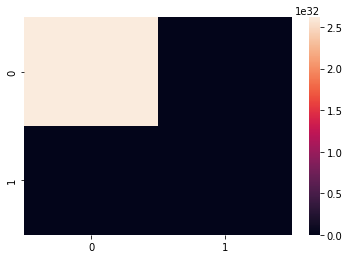

In [268]:
cov_matrix_acc_hohenwert = np.cov(sampled_acc_HR,sampled_hohenwert_HR)
sns.heatmap(cov_matrix_acc_hohenwert)

In [269]:
df = pd.DataFrame({'sampled_acc_HR':sampled_acc_HR.values, 'sampled_hohenwert_HR':sampled_hohenwert_HR.values})
pearson_corr = df.corr(method='pearson')

<AxesSubplot:>

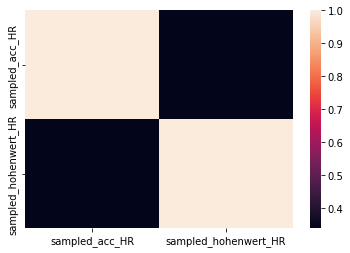

In [270]:
sns.heatmap(pearson_corr)

### taking the x subsequent acceleration points before and after a given height measurement and then average over those

In [229]:
print(239 / 27) 
list_1 = [1,2,3,4,5]
list_2 = [1,2,3,4,5,6,7,8,9,10]
new_acc = []
for average_counter in range(0,10,2):
    #print(average_counter)
    val = list_2[average_counter:average_counter+1]
    print(val)

8.851851851851851
[1]
[3]
[5]
[7]
[9]


In [252]:
new_acc = []
#for hohenwert_counter, hohenwert in enumerate(sample_matrix_hohenwert['HR']):
for average_counter in range(0,239,8):
    #if average_counter == 0: continue
    val = sample_matrix_acceleration['HR'][average_counter-8:average_counter+8].mean()
    new_acc.append(val)

new_acc = new_acc[1:-2]
len(new_acc)

27

<AxesSubplot:>

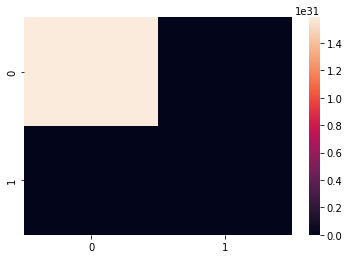

In [261]:
cov_hohenwert_acc_averaged = np.cov(new_acc,sample_matrix_hohenwert['HR'])
sns.heatmap(cov_hohenwert_acc_averaged)

<AxesSubplot:>

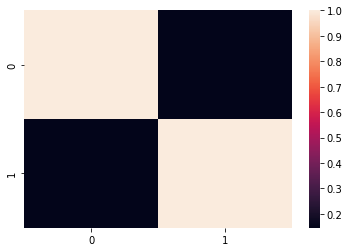

In [263]:
cov_pearson_hohenwert_acc_averaged = np.corrcoef(new_acc,sample_matrix_hohenwert['HR'])
sns.heatmap(cov_pearson_hohenwert_acc_averaged)